In [16]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython.data_utils import identify_columns_with_na

from functions import initialize
import plotly.express as px


# Inizializzazione del dataset :
- import del dataset
- drop della feature "Sale_Price" da predirre
- split in train e test
- inizializzazione indice

In [2]:
house_df = pd.read_csv('dataset/dataHouse.csv')
def load_and_split():
    
    #displayed column range increased
    pd.set_option("display.max_columns", 100) 
    X=house_df
    y=house_df["Sale_Price"]
    
    #split dataset test and train
    return train_test_split(X,y,test_size=0.25)

# set id column as new dataset index
def set_new_index():
    house_df.set_index('id', inplace=True)
 
#read dataset
 
X_train, X_test,y_train, y_test = load_and_split()
#export train and test to csv
X_test.to_csv('dataset/test_data.csv', index=False)
X_train.to_csv('dataset/train_data.csv', index=False)

set_new_index()

In [35]:
X_train,X_test,house_df=initialize()     

# Omogeneizzazione del tipo delle colonne:
- da int64 a float64

In [36]:
def uniform_features_type(dt):
    #loop through dataset colums
    for column in dt.columns: 
        #check column type
        if dt.dtypes[column] == np.int64 : 
            #convert type from int64 to float64 
            dt[column]=dt[column].astype(np.float64)    
   
uniform_features_type(X_train)

In [37]:
identify_columns_with_na(house_df) # 0 columns with NaN values (LUCKY!)

Empty DataFrame
Columns: [column, na_count]
Index: []

In [38]:

ALL_COLUMNS = set(house_df.columns.array) #create set with all column name
NUMERICAL_COLUMNS = set(house_df._get_numeric_data().columns) #NUMERICAL COLUMNS SET
CATEGORICAL_COLUMNS = (ALL_COLUMNS - NUMERICAL_COLUMNS ) # CATEGORICAL COLUMNS SET
print(f"CATEGORICAL: {CATEGORICAL_COLUMNS}")
print(f"NUMERICAL: {NUMERICAL_COLUMNS}")


CATEGORICAL: {'Neighborhood', 'Kitchen_Qual', 'Garage_Qual', 'Misc_Feature', 'Utilities', 'Mas_Vnr_Type', 'Functional', 'Central_Air', 'BsmtFin_Type_1', 'Heating', 'Pool_QC', 'Condition_1', 'Sale_Condition', 'Electrical', 'Condition_2', 'Exter_Qual', 'Alley', 'Lot_Shape', 'Land_Contour', 'Garage_Finish', 'MS_SubClass', 'Bsmt_Qual', 'BsmtFin_Type_2', 'Overall_Cond', 'Foundation', 'Exter_Cond', 'Bsmt_Cond', 'Fireplace_Qu', 'Roof_Style', 'MS_Zoning', 'Street', 'Exterior_1st', 'Bsmt_Exposure', 'Garage_Type', 'Heating_QC', 'Bldg_Type', 'Garage_Cond', 'Lot_Config', 'House_Style', 'Paved_Drive', 'Land_Slope', 'Overall_Qual', 'Exterior_2nd', 'Sale_Type', 'Fence', 'Roof_Matl'}
NUMERICAL: {'Screen_Porch', 'Mo_Sold', 'Longitude', 'Garage_Area', 'id', 'Three_season_porch', 'Half_Bath', 'TotRms_AbvGrd', 'Sale_Price', 'Open_Porch_SF', 'First_Flr_SF', 'BsmtFin_SF_2', 'Enclosed_Porch', 'Misc_Val', 'Year_Sold', 'Year_Remod_Add', 'Year_Built', 'Full_Bath', 'Latitude', 'Bsmt_Unf_SF', 'Gr_Liv_Area', 'Low_

In [39]:
def print_unique_column_values(column_name, dt):
    #print(f"{set(house_df[column_name])}")
    print(f"{column_name}: N° {len(set(dt[column_name]))} -- {(set(dt[column_name]))} ")

for column in sorted(CATEGORICAL_COLUMNS): #print in alphabetic order categorical features and their possible values
    print_unique_column_values(column, X_train)

Alley: N° 3 -- {'Paved', 'No_Alley_Access', 'Gravel'} 
Bldg_Type: N° 5 -- {'OneFam', 'Twnhs', 'TwoFmCon', 'TwnhsE', 'Duplex'} 
BsmtFin_Type_1: N° 7 -- {'Rec', 'BLQ', 'ALQ', 'No_Basement', 'LwQ', 'GLQ', 'Unf'} 
BsmtFin_Type_2: N° 7 -- {'Rec', 'BLQ', 'ALQ', 'No_Basement', 'LwQ', 'GLQ', 'Unf'} 
Bsmt_Cond: N° 6 -- {'Excellent', 'Poor', 'No_Basement', 'Fair', 'Typical', 'Good'} 
Bsmt_Exposure: N° 5 -- {'Mn', 'Av', 'No', 'Gd', 'No_Basement'} 
Bsmt_Qual: N° 6 -- {'Excellent', 'Poor', 'No_Basement', 'Fair', 'Typical', 'Good'} 
Central_Air: N° 2 -- {'N', 'Y'} 
Condition_1: N° 9 -- {'RRNe', 'RRAn', 'PosA', 'RRAe', 'PosN', 'Artery', 'RRNn', 'Norm', 'Feedr'} 
Condition_2: N° 8 -- {'RRAn', 'PosA', 'RRAe', 'PosN', 'Artery', 'RRNn', 'Norm', 'Feedr'} 
Electrical: N° 6 -- {'Unknown', 'FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'} 
Exter_Cond: N° 5 -- {'Excellent', 'Poor', 'Fair', 'Typical', 'Good'} 
Exter_Qual: N° 4 -- {'Good', 'Fair', 'Excellent', 'Typical'} 
Exterior_1st: N° 16 -- {'CBlock', 'AsphShn', '

STUDIO DELLE FEATURES TRAMITE MATRICE DI CORRELAZIONE:
 - numerical features
 - categorial features
 - numerical and categorical features

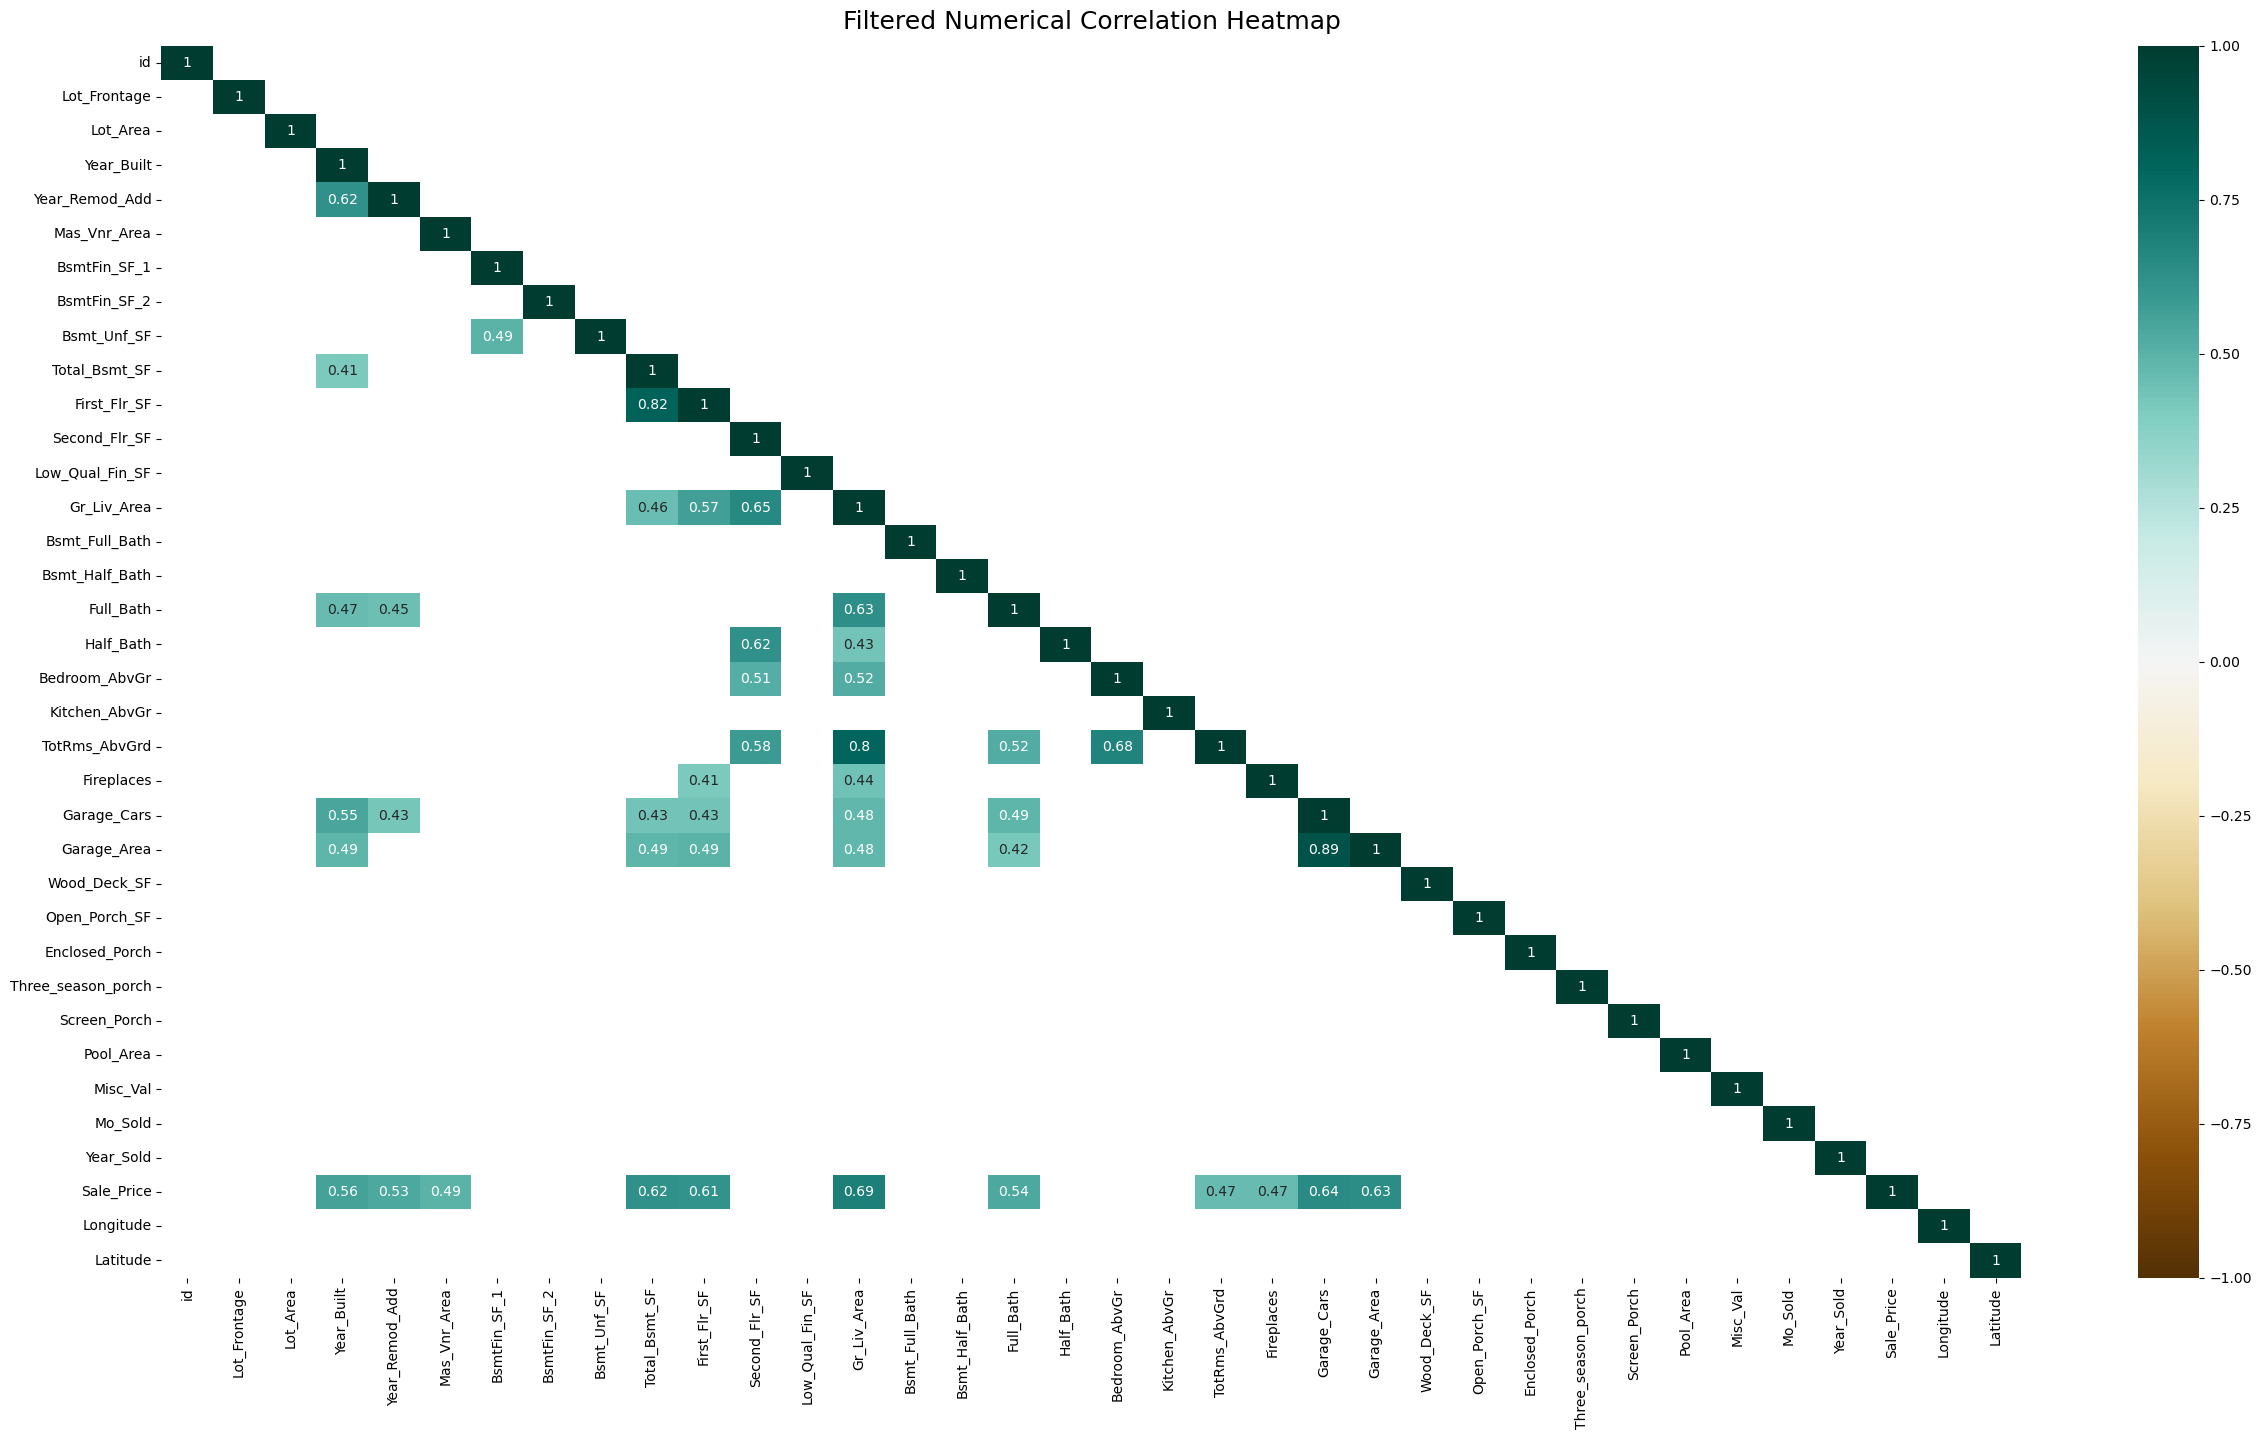

In [40]:
# Selecting the best variables and setting them as predictors for the model, check multicollinearity for model and create new features: ex. bathroom
# house_condition , quality, pool ecc.

#TODO : fare prima la verifica di multicollinearità e poi creare le variabili nuove

'''
Create correlation heatmap of lower matrix triangle of correlation matrix dataset
Visualize only values higher than a set threshold
Optional image Save 
'''
def corr_heatmap(corr_matrix_dt, threshold, save_flag, w, h):#dt : -> None dataframe, threshold : threshold_values filter, save_flag : save image or not, width, height
    plt.figure(figsize= (w, h))

    mask_ = np.triu(np.ones_like(corr_matrix_dt),k=1) #lower tringle matrix - k=1 includes the matrix diagonal
    filter = np.abs(corr_matrix_dt<threshold) #correlation value filter under 

    #print upper tringle matrix values where values are upper than threshold value
    heatmap = sns.heatmap(corr_matrix_dt, mask=mask_ | filter, vmin=-1, vmax=1, annot=True, cmap='BrBG',  fmt='.2g') 
    heatmap.set_title('Filtered Numerical Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
    # save heatmap as .png file
    # dpi - sets the resolution of the saved image in dots/inches
    # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
    if save_flag :
        plt.savefig(f'heatmaps/heatmap_{threshold}.png', dpi=300, bbox_inches='tight')

#
corr_heatmap(X_train.corr(), 0.4, True, 30, 16)


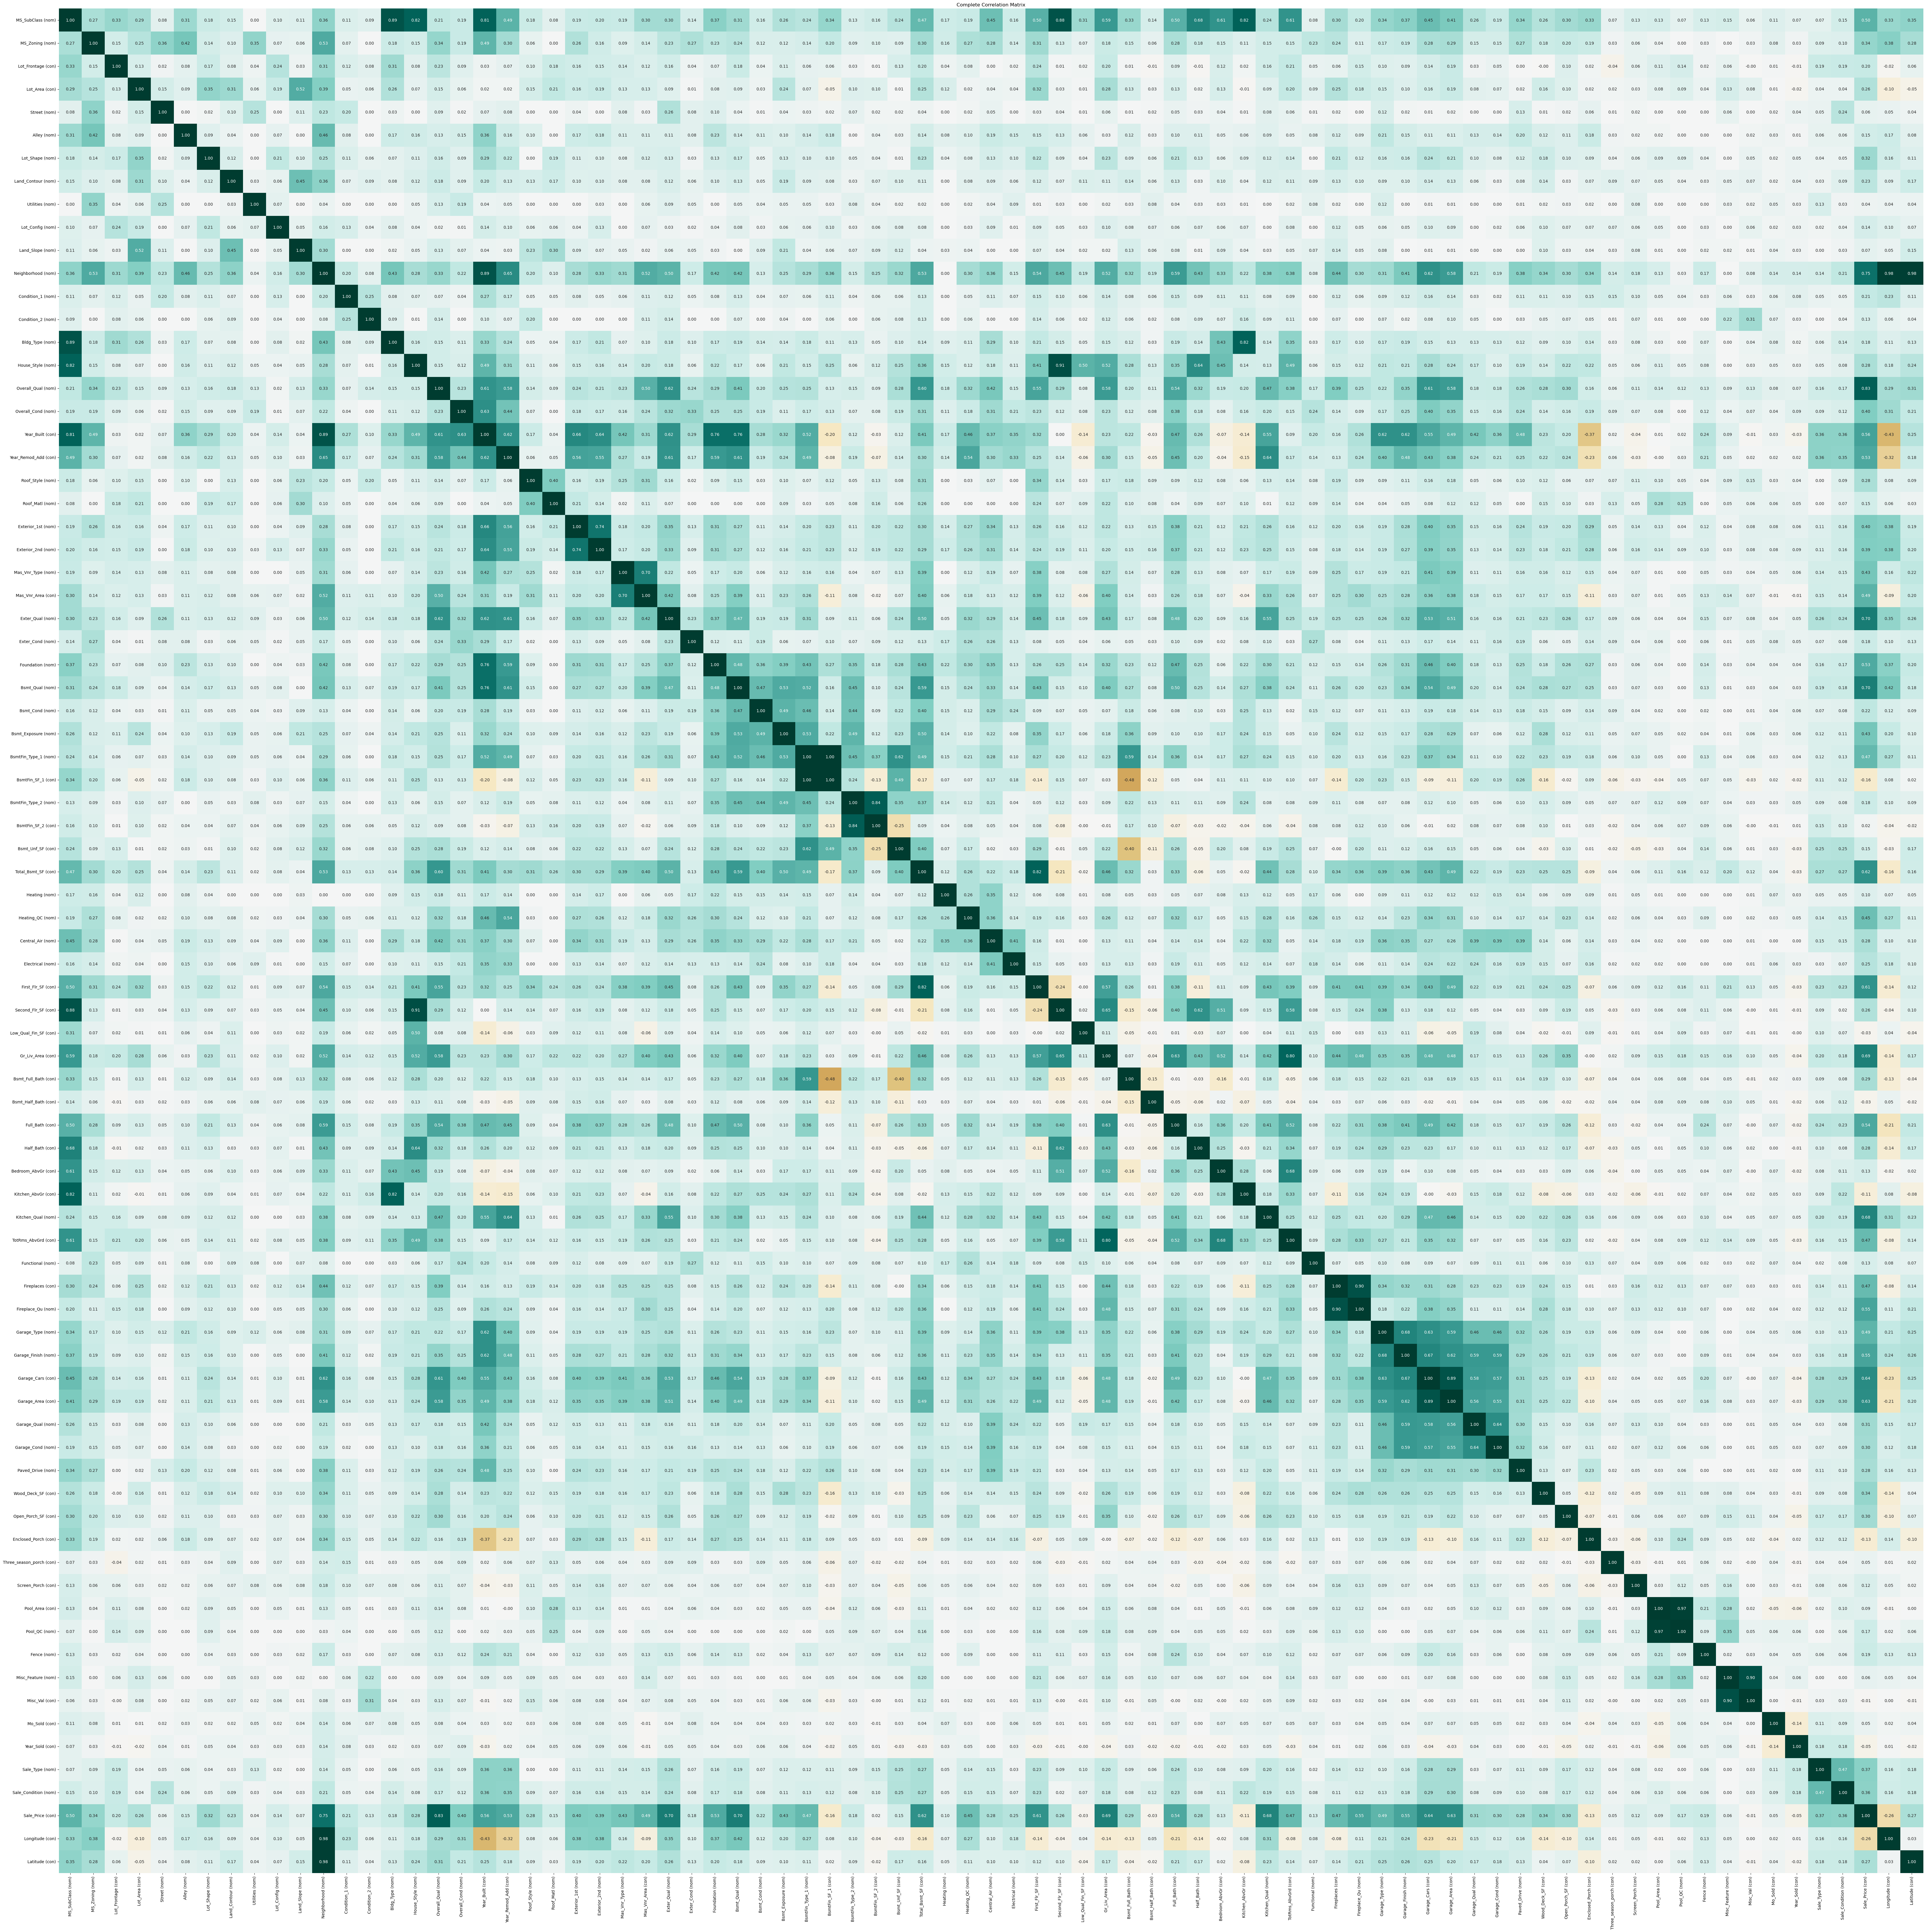

In [17]:
df_temp=X_train.drop(['id'], axis=1)
'''
Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using: * 
Pearson's R for continuous-continuous cases * 
Correlation Ratio for categorical-continuous cases * 
Cramer's V or Theil's U for categorical-categorical cases
'''
associations=associations(df_temp, nominal_columns='auto', numerical_columns=None, mark_columns=True, nom_nom_assoc='cramer', num_num_assoc='pearson', 
                                            cramers_v_bias_correction=True, nan_strategy='string', 
                                            ax=None, figsize=(83,83), annot=True, fmt='.2f', 
                                            cmap='BrBG', sv_color='silver', cbar=False, 
                                            vmax=1.0, vmin=None, plot=False, compute_only=True, clustering=False, title='Complete Correlation Matrix', multiprocessing=True,
                                            filename='heatmaps\complete_correlation.png')

In [41]:
complete_correlation_matrix = associations['corr']

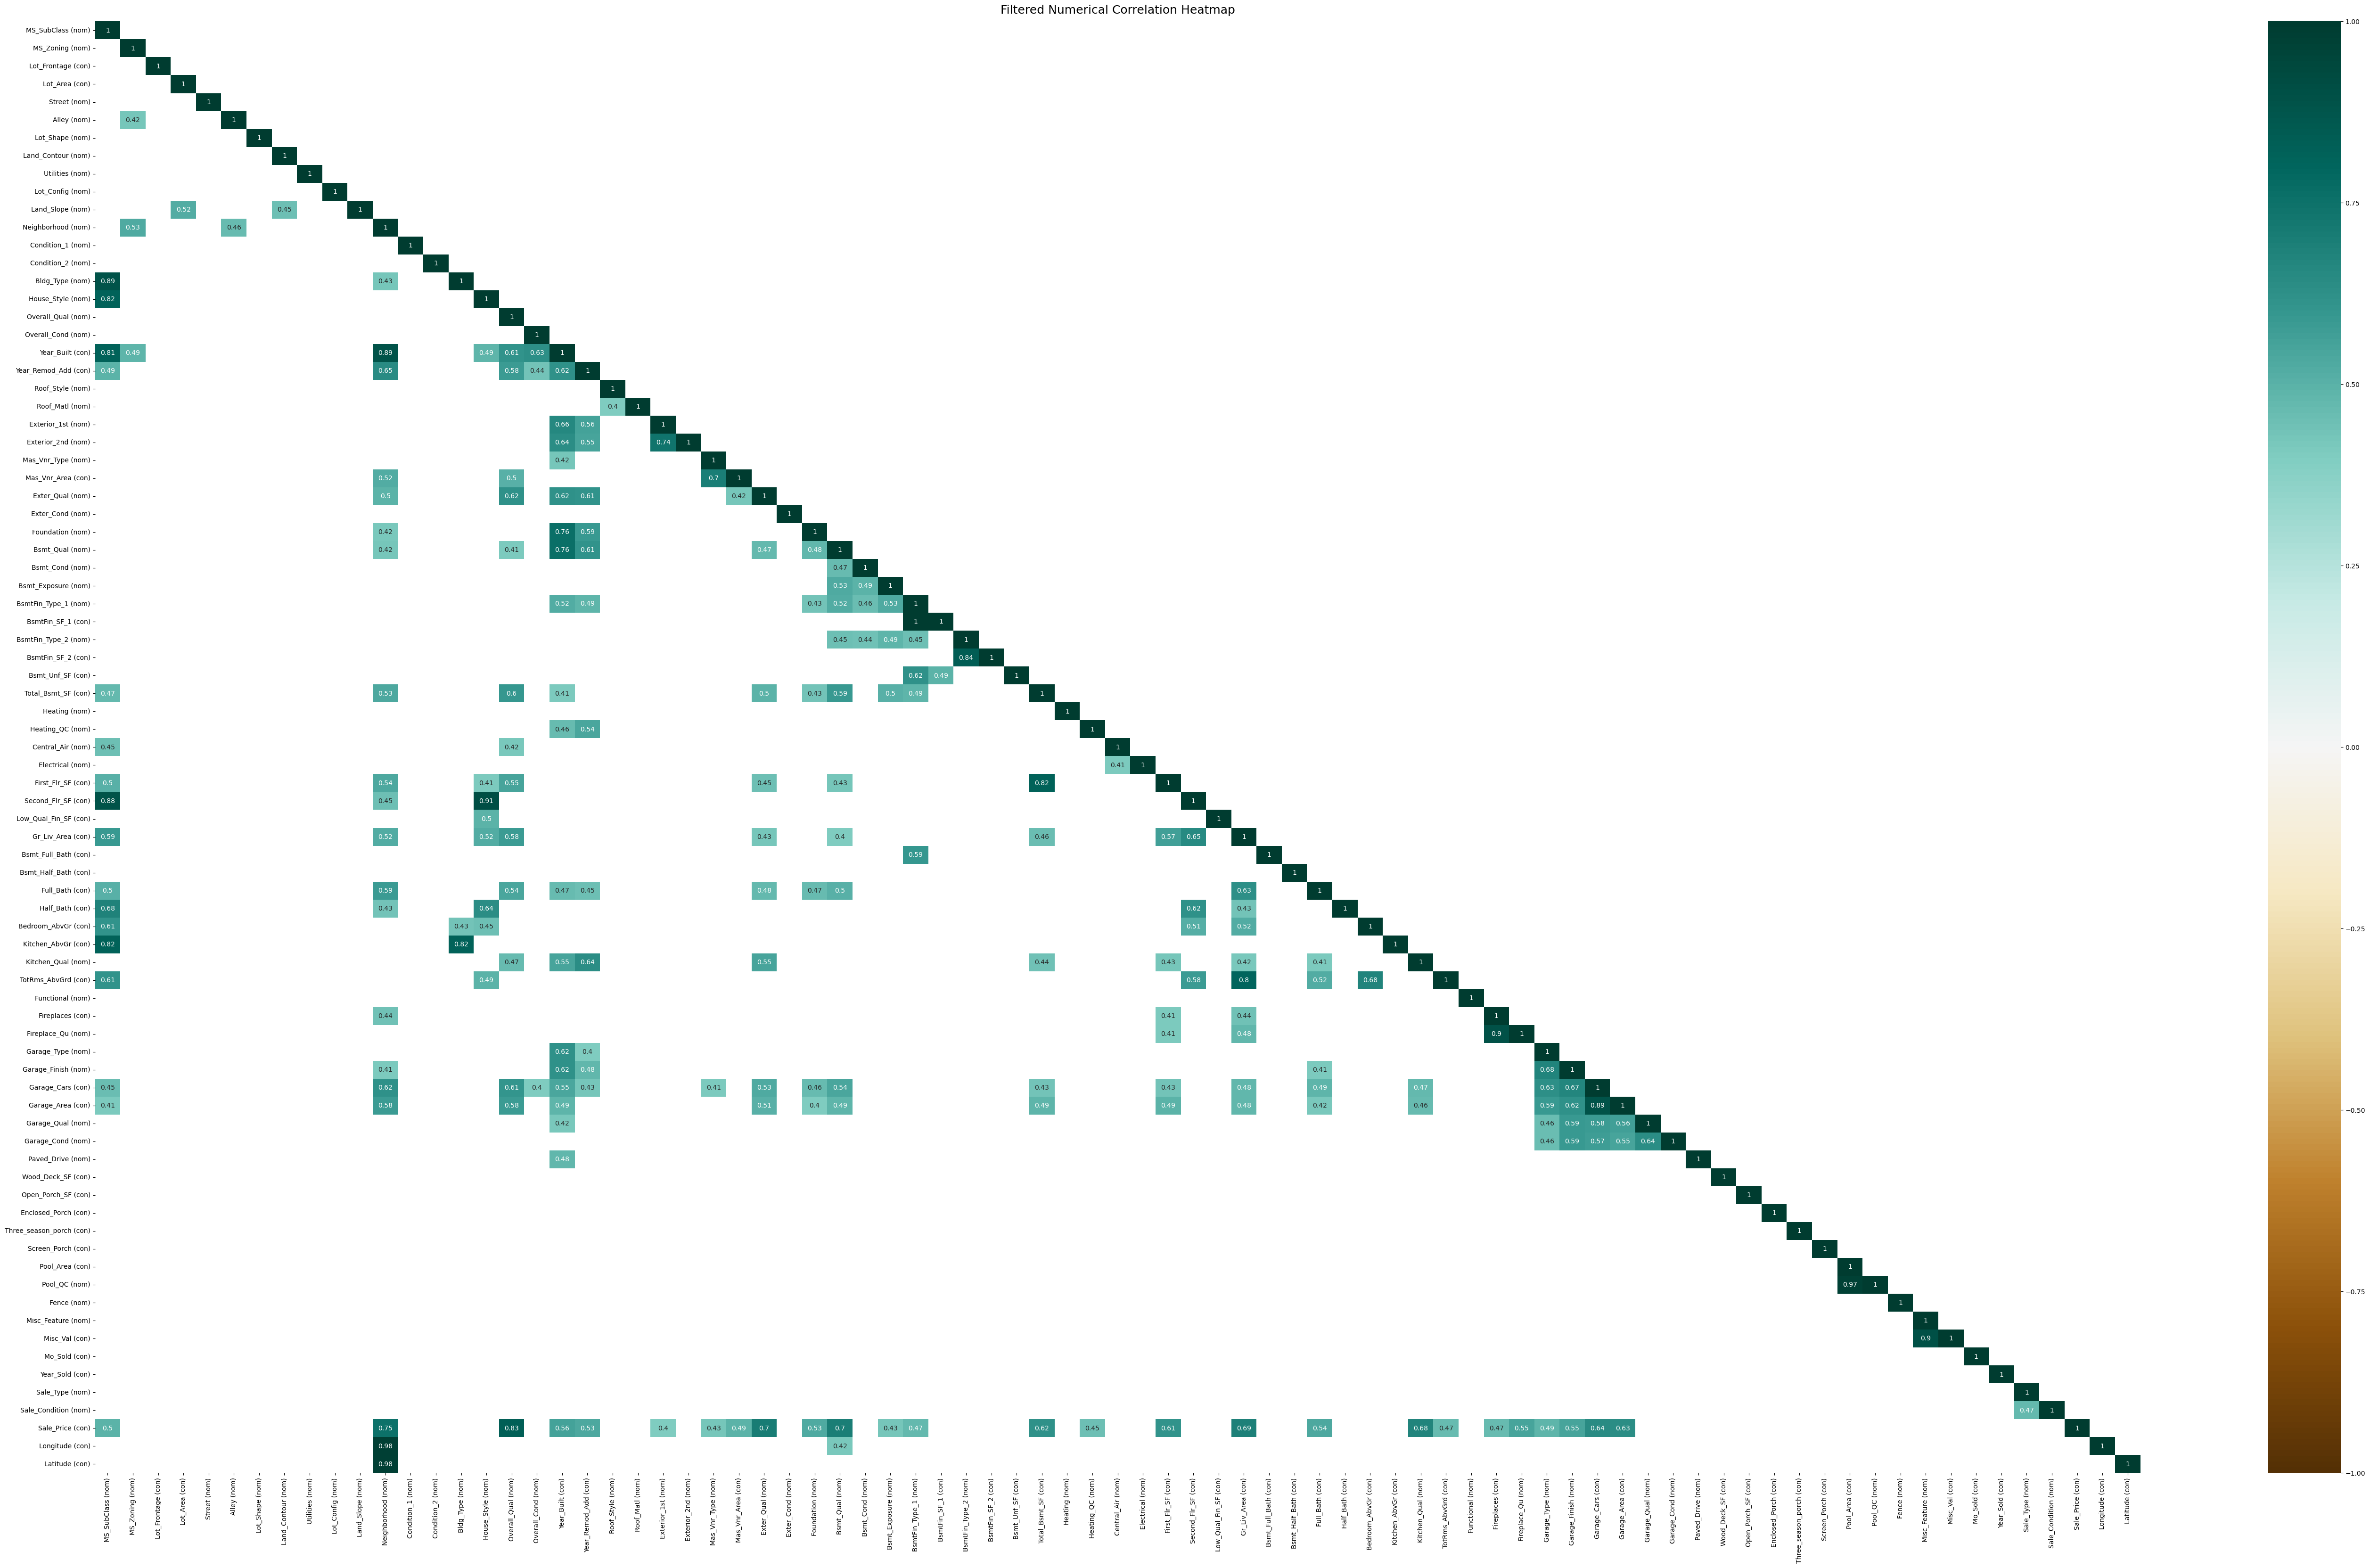

In [42]:
corr_heatmap(complete_correlation_matrix, 0.4, False, 70,40)

In [43]:
'''
Extract couples inside correlation matrix dataset with
correlation value higher than a set threshold
'''
def extract_corr_couples(corr_matrix, threshold): 
    couples=[]
    for rowIndex, row in corr_matrix.iterrows(): #iterate over rows
        for columnIndex, value in row.items(): #iterate over columns 
            if value!=1 and value>=threshold: #check corr_value
                couples.append((rowIndex,columnIndex,value)) # append tuple with two features and corr_vaule (foreach couple)
            
    for element in couples:
        couples.remove((element[1],element[0], element[2])) #remove duplicate combination from couples list
        
    return sorted(couples, key=lambda x : x[2], reverse=True) #sort by value, descending order

    
high_couples=extract_corr_couples(complete_correlation_matrix, 0.7)
print(high_couples)

[('BsmtFin_Type_1 (nom)', 'BsmtFin_SF_1 (con)', 0.9988829248256146), ('Neighborhood (nom)', 'Latitude (con)', 0.9815569787821736), ('Neighborhood (nom)', 'Longitude (con)', 0.978291153476429), ('Pool_Area (con)', 'Pool_QC (nom)', 0.9730416768872036), ('House_Style (nom)', 'Second_Flr_SF (con)', 0.9102773035234304), ('Misc_Feature (nom)', 'Misc_Val (con)', 0.9016944647208485), ('Fireplaces (con)', 'Fireplace_Qu (nom)', 0.8982194555726364), ('Garage_Cars (con)', 'Garage_Area (con)', 0.8885164099122853), ('Neighborhood (nom)', 'Year_Built (con)', 0.8870163515685292), ('MS_SubClass (nom)', 'Bldg_Type (nom)', 0.8855951213304695), ('MS_SubClass (nom)', 'Second_Flr_SF (con)', 0.8828806686660361), ('BsmtFin_Type_2 (nom)', 'BsmtFin_SF_2 (con)', 0.8401540187222726), ('Overall_Qual (nom)', 'Sale_Price (con)', 0.8313688189268291), ('MS_SubClass (nom)', 'House_Style (nom)', 0.8197599286576803), ('Total_Bsmt_SF (con)', 'First_Flr_SF (con)', 0.8189521905642513), ('MS_SubClass (nom)', 'Kitchen_AbvGr (

In [44]:
fig=px.scatter(X_train, x="Pool_Area", y="Sale_Price", color="Sale_Price", width=700 )
fig.show()
'''
Create new Feature Has_Pool based on Pool_QC
Has_Pool confirm if a House has a pool or not
'''
def transform_pool(df):
    df["Has_Pool"]=np.where(df["Pool_QC"].str.contains('No_Pool'), 0 , 1) #create new column, fill with 1 if house has Pool, else 0
    #print(len(house_df[house_df['Pool_QC']=='Excellent'])) #4 house have excellent pool
    df.drop("Pool_QC", axis=1, inplace=True) #drop "Pool_Quality" feature, keep only "Has_Pool" feature

In [45]:
'''
Merge all bath features in one quantitative feature
'''
def transform_bathroom(df):
    #get all bath features
    bath=[x for x in df.columns if 'Bath' in x] 
    #sum all feature values and save it inside total bath feature
    df['Total_Bath'] = df[bath].sum(axis=1) 
    #drop old bath features
    df.drop(['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath'], axis=1, inplace=True) 

In [46]:
transform_pool(X_train)
fig=px.box(X_train, x="Has_Pool", y="Sale_Price", color="Has_Pool", width=700, points="all" )
fig.show()

In [48]:
#transform_bathroom(X_train)
fig=px.box(X_train, x="Total_Bath", y="Sale_Price",color="Total_Bath", height=800, width=1500)
fig.show()

In [74]:
fig=px.box(X_train, x="Neighborhood", y="Sale_Price",color="Neighborhood", height=800, width=1500)
fig.show()

In [49]:

fig = px.scatter_mapbox(X_train, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Neighborhood", 
                        hover_data=["Year_Built", "Sale_Price"],
                        color="Neighborhood", #color change based on neighborhood
                        color_discrete_sequence=px.colors.qualitative.Dark24_r,
                        size="Sale_Price", #circle dimension based on Sale Price
                        zoom=13, 
                        height=800,
                        width=1500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#drop sale price from train and test dataset
X_test.drop(['Sale_Price'], axis=1, inplace=True)
X_train.drop(['Sale_Price'], axis=1, inplace=True)